<a href="https://colab.research.google.com/github/EricDarve/cme216-spring-2020/blob/master/Code/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score

In [0]:
# +1 if x > y and -1 otherwise
def labels_line(p):
  if p[0] > p[1]:
    return 1
  else:
    return -1

# +1 if y > sin(5x)/2 and -1 otherwise
def labels_sine(p):
  if p[1] > math.sin(5*p[0]) / 2:
    return 1
  else:
    return -1   

Shape of X:  (8, 2)
[[-0.1280102  -0.94814754]
 [ 0.09932496 -0.12935521]
 [-0.1592644  -0.33933036]
 [-0.59070273  0.23854193]
 [-0.40069065 -0.46634545]
 [ 0.24226767  0.05828419]
 [-0.73084011  0.02715624]
 [-0.63112027  0.5706703 ]]
Shape of y:  (8,)
[ 1.  1.  1. -1.  1.  1. -1. -1.]


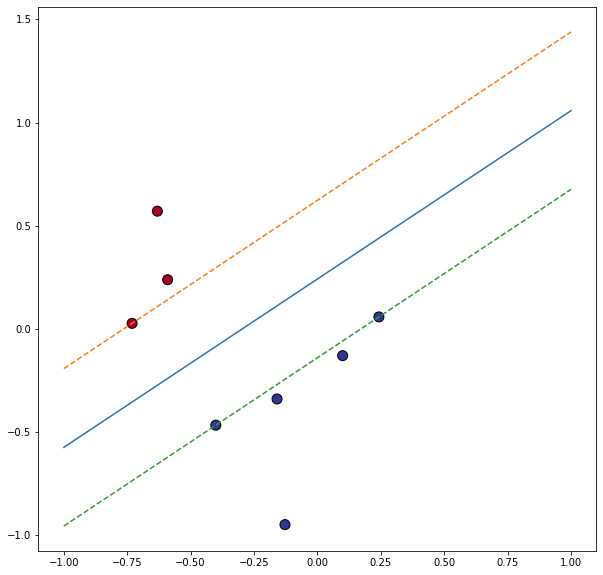

In [116]:
# we create 8 random uniform points in the unit square

np.random.seed(2)
X = 2*np.random.rand(8, 2) - 1

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

print('Shape of X: ', X.shape)
print(X)
print('Shape of y: ', y.shape)
print(y)

clf = svm.SVC(kernel='linear', C=1e2)
clf.fit(X, y)

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')

x_df = np.linspace(-1, 1, 2)
a = -clf.coef_[0,0] / clf.coef_[0,1]
b = -clf.intercept_ / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b)

b = -(1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')
b = -(-1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')

plt.show()

In [0]:
def plot_decision_function(classifier, axis, title, size):
    # plot the decision function
    xx, yy = np.meshgrid(size*np.linspace(-1, 1, 500), 
                         size*np.linspace(-1, 1, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    # Computes the decision function that separates the 1 labels 
    # from the -1 labels
    # ravel() returns a contiguous flattened array
    # c_ concatenates arrays along the 2nd dimension
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=0.9,
                 cmap=plt.cm.RdYlBu, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

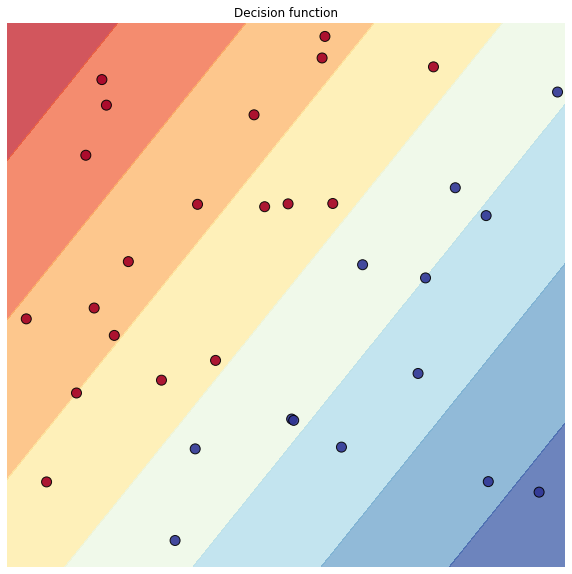

In [118]:
# 20 uniform points in the unit square
# the decision function is plotted

np.random.seed(2020)
X = 2*np.random.rand(32, 2) - 1

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# fit the model
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

# plot
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(clf, ax, "Decision function",1)
plt.show()

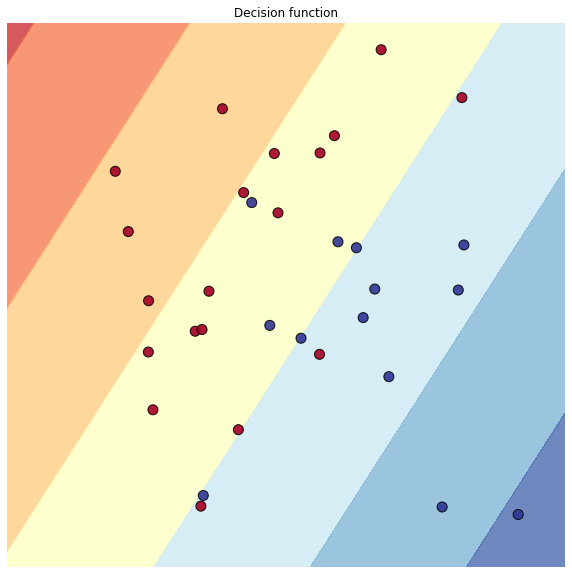

In [119]:
# 20 uniform points in the unit square
# noise is added to the coordinates of the points

np.random.seed(2020)
X = 2*np.random.rand(32, 2) - 1

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# randomly perturb the points X
for i in range(0,X.shape[0]):
  X[i,:] = X[i,:] + ( 2*np.random.rand(1, 2) - 1 ) / 2

# fit the model
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

# plot
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(clf, ax, "Decision function",1.5)
plt.show()

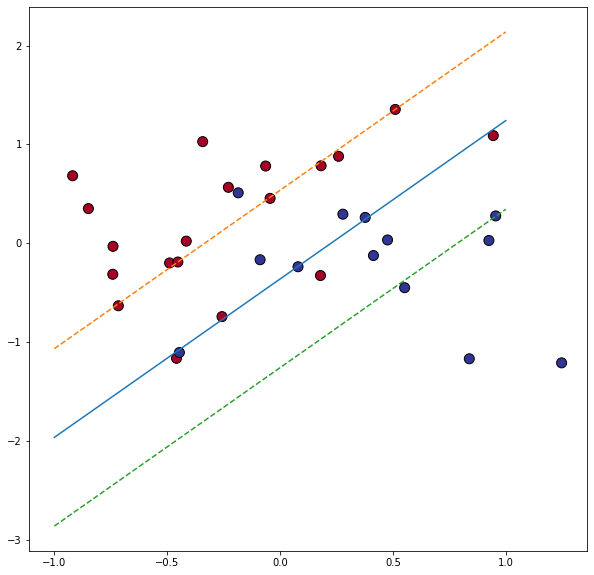

In [120]:
# plot points and decision line

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')

x_df = np.linspace(-1, 1, 2)
a = -clf.coef_[0,0] / clf.coef_[0,1]
b = -clf.intercept_ / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b)

b = -(1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')
b = -(-1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')

plt.show()

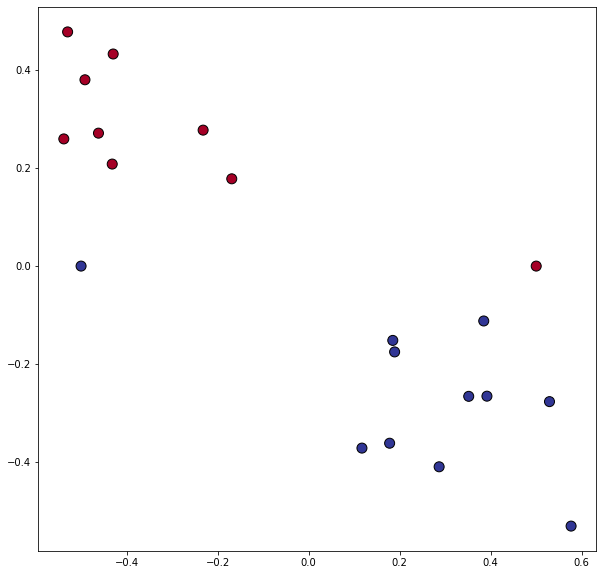

In [121]:
# 2 outlier points

np.random.seed(2020)

# two clusters of points
X = np.r_[np.random.rand(10, 2)/2 + [-0.6, 0.1], 
          np.random.rand(10, 2)/2 + [0.1, -0.6]]

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# creating two outliers
X[0,:] = np.array([0.5, 0])
y[0] = -1
X[1,:] = np.array([-0.5, 0])
y[1] = 1

# plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.show()

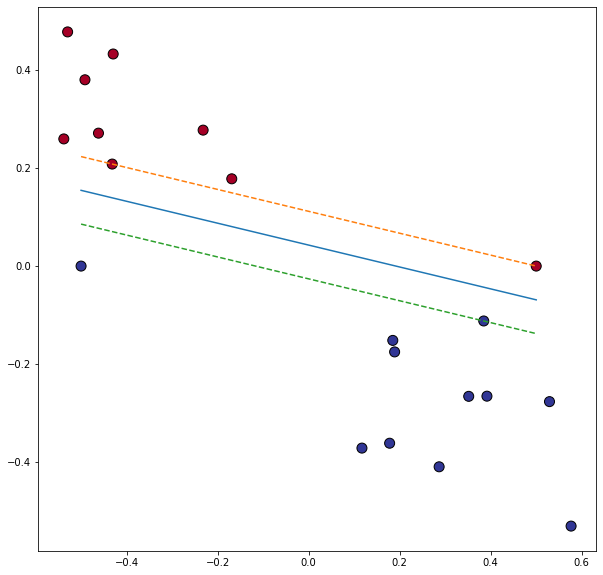

In [122]:
# 2 outlier points
# Large value of C = overfit

np.random.seed(2020)

# two clusters of points
X = np.r_[np.random.rand(10, 2)/2 + [-0.6, 0.1], 
          np.random.rand(10, 2)/2 + [0.1, -0.6]]

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# creating two outliers
X[0,:] = np.array([0.5, 0])
y[0] = -1
X[1,:] = np.array([-0.5, 0])
y[1] = 1

# fit the model
clf = svm.SVC(kernel="linear", C = 1e4)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')

x_df = np.linspace(-0.5, 0.5, 2)
a = -clf.coef_[0,0] / clf.coef_[0,1]
b = -clf.intercept_ / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b)
b = -(1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')
b = -(-1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')

plt.show()

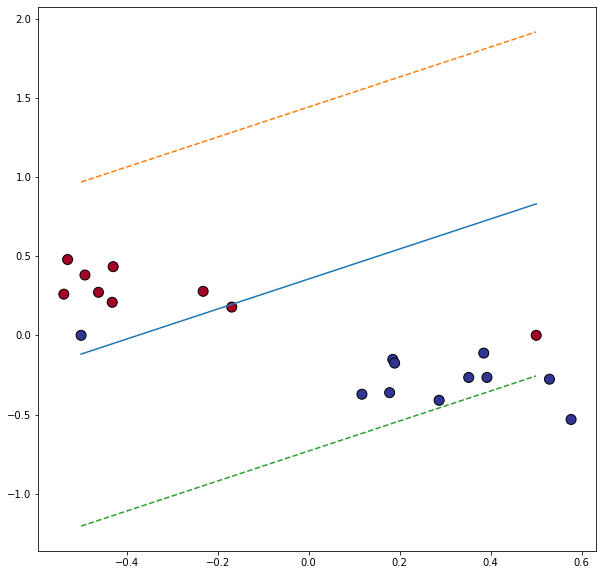

In [123]:
# outliers

# small C; under-fitting case; prediction is not accurate

# fit the model
clf = svm.SVC(kernel="linear", C = 0.2)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')

x_df = np.linspace(-0.5, 0.5, 2)
a = -clf.coef_[0,0] / clf.coef_[0,1]
b = -clf.intercept_ / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b)
b = -(1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')
b = -(-1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')

plt.show()

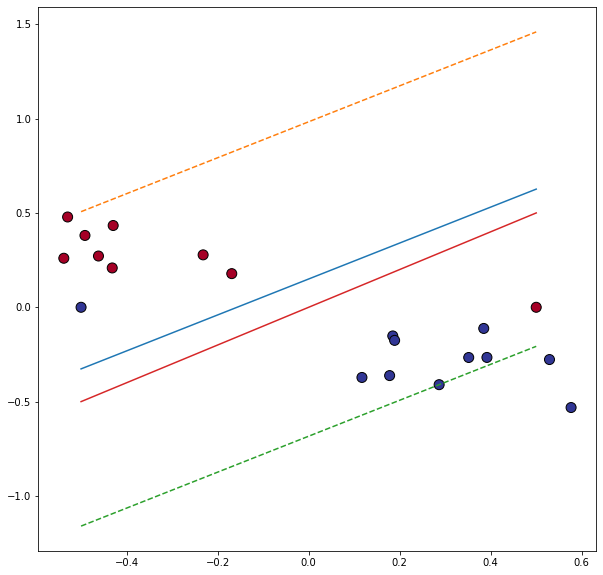

In [124]:
# outliers

# fit the model
clf = svm.SVC(kernel="linear", C = 0.3)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, edgecolors='black')

x_df = np.linspace(-0.5, 0.5, 2)
a = -clf.coef_[0,0] / clf.coef_[0,1]
b = -clf.intercept_ / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b)
b = -(1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')
b = -(-1 + clf.intercept_) / clf.coef_[0,1]
ax.plot(x_df,a*x_df + b, linestyle='dashed')

ax.plot(x_df,x_df)

plt.show()

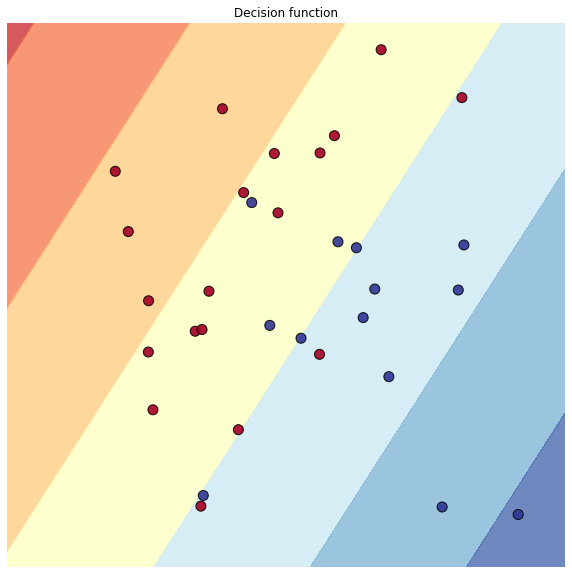

In [125]:
# Data with noise
# noise is added to the coordinates of the points

np.random.seed(2020)
X = 2*np.random.rand(32, 2) - 1

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# randomly perturb the points X
for i in range(0,X.shape[0]):
  X[i,:] = X[i,:] + ( 2*np.random.rand(1, 2) - 1 ) / 2

# fit the model
clf = svm.SVC(kernel="linear",C=1)
clf.fit(X, y)

# plot
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(clf, ax, "Decision function",1.5)
plt.show()

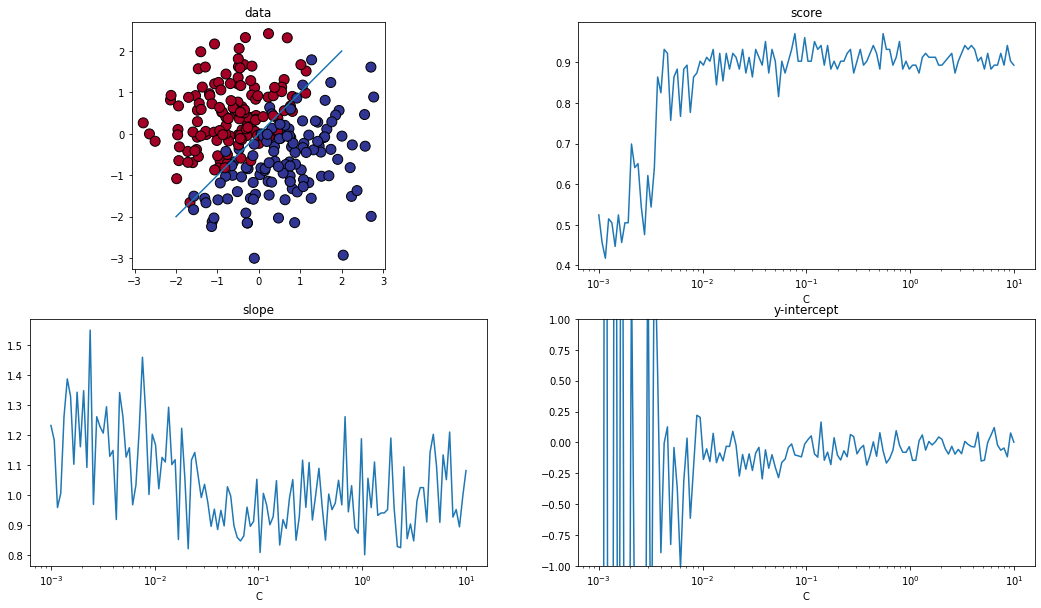

In [126]:
from sklearn.model_selection import train_test_split

np.random.seed(2020)

X = np.random.randn(256, 2)

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_line(X[i,:])

# randomly perturb the points X
for i in range(0,X.shape[0]):
  X[i,:] = X[i,:] + np.random.randn(2)/4

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdYlBu, 
            edgecolors='black')
x_ref = np.linspace(-2, 2, 2)
plt.plot(x_ref,x_ref)
ax.set_aspect(1)
plt.title("data")

n_opt_C = 128

C_range = np.logspace(-3,1,n_opt_C)
k = 0
score = np.zeros(n_opt_C)
a = np.zeros(n_opt_C)
b = np.zeros(n_opt_C)
f1 = np.zeros(n_opt_C)
precision = np.zeros(n_opt_C)
recall = np.zeros(n_opt_C)

for C in C_range:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

  clf = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
  score[k] = clf.score(X_test, y_test)
  a[k] = -clf.coef_[0,0] / clf.coef_[0,1]
  b[k] = -clf.intercept_ / clf.coef_[0,1]  
  
  # y_pred = clf.predict(X_test)
  # f1[k] = f1_score(y_test, y_pred)
  # if np.argwhere(y_pred == 1.).shape[0] > 0:
  #   precision[k] = precision_score(y_test, y_pred)
  # else:
  #   precision[k] = 0
  # recall[k] = recall_score(y_test, y_pred)

  k = k+1

# plot
plt.subplot(222)
plt.plot(C_range,score,label="score")
plt.xscale("log")
plt.xlabel("C")
plt.title("score")

plt.subplot(223)
plt.plot(C_range,a,label="score")
plt.xscale("log")
plt.xlabel("C")
plt.title("slope")

plt.subplot(224)
plt.plot(C_range,b,label="score")
plt.xscale("log")
plt.title("y-intercept")
plt.xlabel("C")
plt.ylim(-1,1)

plt.show()

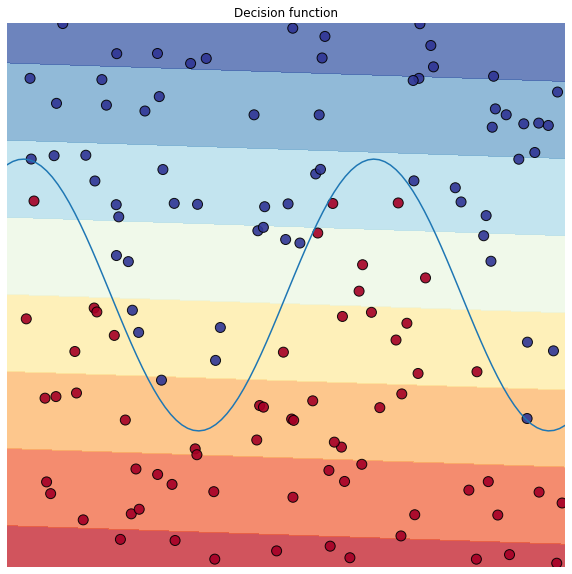

In [127]:
np.random.seed(2020)

# decision curve is the sine function

X = 2*np.random.rand(128, 2) - 1

y = np.zeros(X.shape[0])

# initialize labels
for i in range(0,X.shape[0]):
  y[i] = labels_sine(X[i,:])

# fit the model
# we use a linear SVM which won't work in this case
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))

plot_decision_function(clf, ax, "Decision function",1)

# drae the sin function
x_b = np.linspace(-1, 1, 100)
ax.plot(x_b,np.sin(5*x_b) / 2)

plt.show()

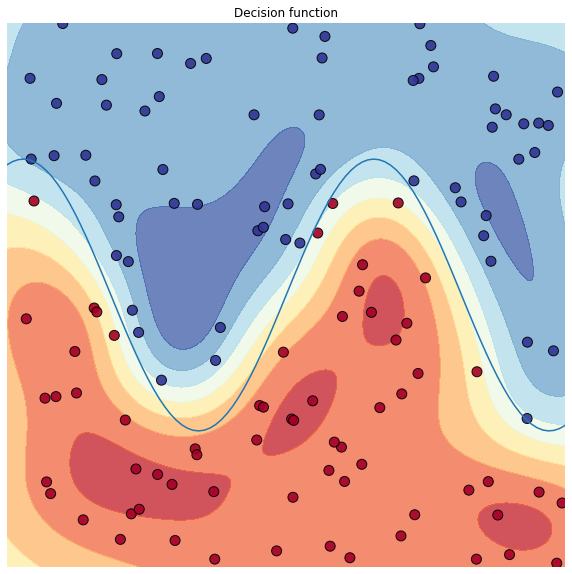

In [128]:
# SVM using RBF kernel

# fit the model
clf = svm.SVC(kernel="rbf", gamma = 10)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))

plot_decision_function(clf, ax, "Decision function",1)

x_b = np.linspace(-1, 1, 100)
ax.plot(x_b,np.sin(5*x_b) / 2)

plt.show()